In [13]:
%matplotlib notebook

In [14]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
bike_trip_df = pd.read_csv("trip.csv",low_memory=False)
bike_trip_df.head()


,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [16]:
#get last 5 rows
bike_trip_df.tail(5)

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
286853,8/31/2016 23:45,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
286854,9/1/2016 0:20,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286855,9/1/2016 0:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286856,9/1/2016 0:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286857,9/1/2016 0:20,SEA00442,1896.031,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [17]:
# Check for nulls
bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   stoptime           286858 non-null  object 
 1   bikeid             286858 non-null  object 
 2   tripduration       286858 non-null  float64
 3   from_station_name  286858 non-null  object 
 4   to_station_name    286858 non-null  object 
 5   from_station_id    286858 non-null  object 
 6   to_station_id      286858 non-null  object 
 7   usertype           286858 non-null  object 
 8   gender             181558 non-null  object 
 9   birthyear          181554 non-null  object 
dtypes: float64(1), object(9)
memory usage: 21.9+ MB


In [18]:
bike_trip_df.count()

stoptime             286858
bikeid               286858
tripduration         286858
from_station_name    286858
to_station_name      286858
from_station_id      286858
to_station_id        286858
usertype             286858
gender               181558
birthyear            181554
dtype: int64

In [19]:
#create a clean dataframe after dropping all null values **check gender & birthyear values are diff from others due to missing values
clean_bike_trip_df = bike_trip_df.dropna()
clean_bike_trip_df.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [20]:
clean_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181554 entries, 0 to 286849
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   stoptime           181554 non-null  object 
 1   bikeid             181554 non-null  object 
 2   tripduration       181554 non-null  float64
 3   from_station_name  181554 non-null  object 
 4   to_station_name    181554 non-null  object 
 5   from_station_id    181554 non-null  object 
 6   to_station_id      181554 non-null  object 
 7   usertype           181554 non-null  object 
 8   gender             181554 non-null  object 
 9   birthyear          181554 non-null  object 
dtypes: float64(1), object(9)
memory usage: 15.2+ MB


In [25]:
#split up data into groups based on Gender
gender_groups = clean_bike_trip_df.groupby('gender')
#find how many of each gender took bike trips

gender_trips = gender_groups['tripduration'].count()
gender_trips



gender
Female       37558
Male        140564
Other         3431
stoptime         1
Name: tripduration, dtype: int64

In [26]:
#get the 3rd place vale from "gender" series
gender_trips.index[3]

'stoptime'

<IPython.core.display.Javascript object>


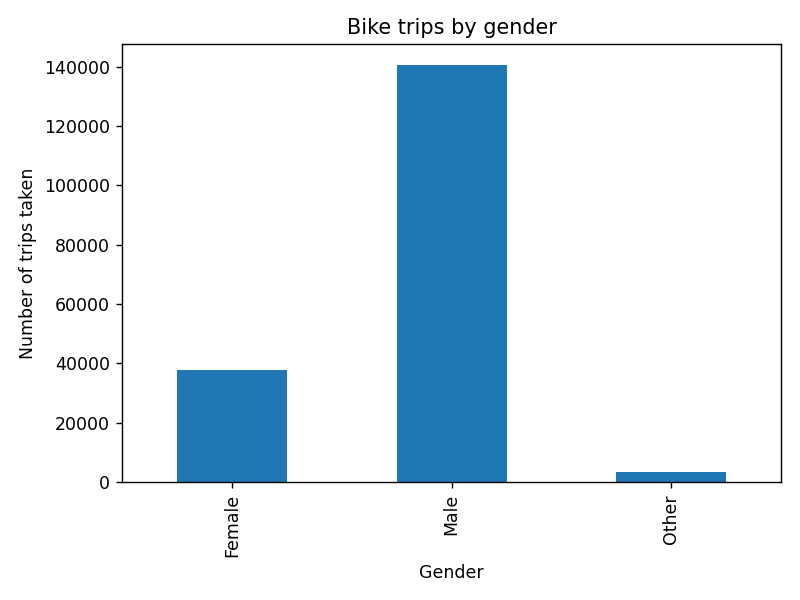

In [27]:
#drop the 'stoptime" row
gender_trips = gender_trips.drop(gender_trips.index[3])
#chart the data
gender_chart = gender_trips.plot(kind = "bar",title="Bike trips by gender")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of trips taken")
plt.show()
plt.tight_layout()